## Исследование уровня потребительской лояльности (NPS)

**Задача:** составить дашборды по цели анализа для менеджеров Заказчика.

**Цель анализа:** Определить текущий уровень потребительской лояльности, или NPS (от англ. Net Promoter Score), среди клиентов из России.

**Ключевые вопросы:** 
* Распределение участников опроса по возрасту, полу и городу ?
* Каких пользователей больше: новых или старых?
* Какие группы пользователей наиболее лояльны к сервису, а какие менее?
* Какой общий NPS среди всех опрошенных?
* Как можно описать клиентов, которые относятся к группе cторонников (англ. promoters)?

**Описание задачи:**
Было произведен опрос для определения уровня лояльности. Клиентам задавали классический вопрос: «Оцените по шкале от 1 до 10 вероятность того, что вы порекомендуете компанию друзьям и знакомым». <br><br>
Для оценки результата опроса оценки разделены на три группы:
- 9-10 баллов — «cторонники» (англ. promoters)
- 7-8 баллов — «нейтралы» (англ. passives)
- 0-6 баллов — «критики» (англ. detractors)

<br>Итоговое значение NPS рассчитывается по формуле: % «сторонников» - % «критиков». <br><br>
Необходимо подготовить дашборд с итогами анализа.


Данные для анализа предоставлены в файле БД SQLite "telecomm_csi.db".

<a name='Описание-данных'>**Описание данных** <br> </a>
В базе данных (БД) содержатся результаты опроса и другие необходимые данные. <br>
БД разделена на таблицы: <br>



**1. user**

| поле           | описание                                                                                                                     |
| -------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| user_id        | Идентификатор клиента, первичный ключ таблицы                                                                                |
| lt_day         | Количество дней «жизни» клиента                                                                                              |
| age            | Возраст клиента в годах                                                                                                      |
| gender_segment | Пол клиента (`1` – женщина, `0` – мужчина)                                                                                   |
| os_name        | Тип операционной системы                                                                                                     |
| cpe_type_name  | Тип устройства                                                                                                               |
| location_id    | Идентификатор домашнего региона клиента, внешний ключ, отсылающий к таблице `location`                                       |
| age_gr_id      | Идентификатор возрастного сегмента клиента, внешний ключ, отсылающий к таблице `age_segment`                                 |
| tr_gr_id       | Идентификатор сегмента клиента по объёму потребляемого трафика в месяц, внешний ключ, отсылающий к таблице `traffic_segment` |
| lt_gr_id       | Идентификатор сегмента клиента по количеству месяцев «жизни», внешний ключ, отсылающий к таблице `lifetime_segment`          |
| nps_score      | Оценка клиента в NPS-опросе (от 1 до 10)                                                                                     |

**2. location**


|поле|описание|
|---|---|
|location_id|Идентификатор записи, первичный ключ|
|country|Страна|
|city|Город|

**3. age_segment**

|поле|описание|
|---|---|
|age_gr_id|Идентификатор сегмента, первичный ключ|
|bucket_min|Минимальная граница сегмента|
|bucket_max|Максимальная граница сегмента|
|title|Название сегмента|

**4. traffic_segment** 

|поле|описание|
|---|---|
|tr_gr_id|Идентификатор сегмента, первичный ключ|
|bucket_min|Минимальная граница сегмента|
|bucket_max|Максимальная граница сегмента|
|title|Название сегмента|

**5. lifetime_segment**


|поле|описание|
|---|---|
|lt_gr_id|Идентификатор сегмента, первичный ключ|
|bucket_min|Минимальная граница сегмента|
|bucket_max|Максимальная граница сегмента|
|title|Название сегмента|

**ERD БД:**
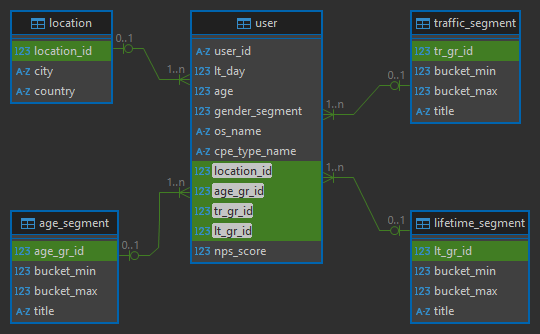  

In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine

### Откроем БД

In [2]:
# путь к БД на вашем компьютере (например, в той же папке, что и тетрадь)
path_to_db_local = r'local.db'
# путь к БД на платформе
path_to_db_platform = '***.db'
# итоговый путь к БД
path_to_db = None

# если путь на вашем компьютере ведёт к БД, то он становится итоговым
# display(os.getcwd()) #проверка текущей директории
if os.path.exists(path_to_db_local):
    path_to_db = path_to_db_local
# иначе: если путь на платформе ведёт к БД, то он становится итоговым
elif os.path.exists(path_to_db_platform):
    path_to_db = path_to_db_platform
# иначе выводится сообщение о том, что файл не найден
else:
    raise Exception('Файл с базой данных SQLite не найден!')

# если итоговый путь не пустой
if path_to_db:
    # то создаём подключение к базе
    engine = create_engine(f'sqlite:///{path_to_db}', echo=False)
    
    # пример запроса
    query = """
    SELECT *
    FROM user;
    """
    
    # создаём датафрейм по данным запроса
    df = pd.read_sql(query, engine)

In [3]:
df.head() #выводим 5 строк

,user_id,lt_day,age,gender_segment,os_name,cpe_type_name,location_id,age_gr_id,tr_gr_id,lt_gr_id,nps_score
0,A001A2,2320,45.0,1.0,ANDROID,SMARTPHONE,55,5,5,8,10
1,A001WF,2344,53.0,0.0,ANDROID,SMARTPHONE,21,5,5,8,10
2,A003Q7,467,57.0,0.0,ANDROID,SMARTPHONE,28,6,9,6,10
3,A004TB,4190,44.0,1.0,IOS,SMARTPHONE,38,4,4,8,10
4,A004XT,1163,24.0,0.0,ANDROID,SMARTPHONE,39,2,6,8,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502493 entries, 0 to 502492
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         502493 non-null  object 
 1   lt_day          502493 non-null  int64  
 2   age             501939 non-null  float64
 3   gender_segment  501192 non-null  float64
 4   os_name         502493 non-null  object 
 5   cpe_type_name   502493 non-null  object 
 6   location_id     502493 non-null  int64  
 7   age_gr_id       502493 non-null  int64  
 8   tr_gr_id        502493 non-null  int64  
 9   lt_gr_id        502493 non-null  int64  
 10  nps_score       502493 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 42.2+ MB


Есть пропуски в age и gender_segment. Это необходимо учитывать при формирование итоговых данных. <br>
Откроем оставшиеся таблицы из БД

In [5]:
#выведем категориальные таблицы
table_list = ['age_segment', 'traffic_segment', 'lifetime_segment']

for table in table_list:
    query_seagment = f'SELECT * FROM {table}'
    df_table = pd.read_sql(query_seagment, engine)
    display(f'table name: {table}', df_table)

'table name: age_segment'

,age_gr_id,bucket_min,bucket_max,title
0,1,NaN,15.0,01 до 16
1,2,16.0,24.0,02 16-24
2,3,25.0,34.0,03 25-34
3,4,35.0,44.0,04 35-44
4,5,45.0,54.0,05 45-54
5,6,55.0,64.0,06 55-64
6,7,66.0,NaN,07 66 +
7,8,NaN,NaN,08 n/a


'table name: traffic_segment'

,tr_gr_id,bucket_min,bucket_max,title
0,1,0.00,0.00,01 0
1,2,0.00,0.01,01 0-0.01
2,3,0.01,0.10,02 0.01-0.1
3,4,0.10,1.00,03 0.1-1
4,5,1.00,5.00,04 1-5
5,6,5.00,10.00,05 5-10
6,7,10.00,15.00,06 10-15
7,8,15.00,20.00,07 15-20
8,9,20.00,25.00,08 20-25
9,10,25.00,30.00,09 25-30


'table name: lifetime_segment'

,lt_gr_id,bucket_min,bucket_max,title
0,1,1.0,1.0,01 1
1,2,2.0,2.0,02 2
2,3,3.0,3.0,03 3
3,4,4.0,6.0,04 4-6
4,5,7.0,12.0,05 7-12
5,6,13.0,24.0,06 13-24
6,7,25.0,36.0,07 25-36
7,8,36.0,NaN,08 36+


### Анализ данных по таблице user

Согласно ТЗ преобразованием данных посредством python/pandas запрещено. <br>
Будем преобразовывать данные на этапе SQL запроса. <br> 
Еще есть возможность выполнить необходимые преобразования в tableau, но для уменьшения данных в tableau (доступно только публичное размещение данных tableau) передадим в tableau максимально 'чистые' данные <br>

In [6]:
df.describe()

,lt_day,age,gender_segment,location_id,age_gr_id,tr_gr_id,lt_gr_id,nps_score
count,502493.000000,501939.000000,501192.000000,502493.000000,502493.000000,502493.00000,502493.000000,502493.000000
mean,1868.841439,39.621946,0.543588,31.237321,4.011045,8.51829,6.890339,7.508562
std,1683.701762,11.188249,0.498097,15.175477,1.159203,4.64590,1.525189,3.020378
min,-21.000000,10.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,533.000000,31.000000,0.000000,20.000000,3.000000,5.00000,6.000000,5.000000
50%,1239.000000,38.000000,1.000000,30.000000,4.000000,7.00000,8.000000,9.000000
75%,3064.000000,47.000000,1.000000,41.000000,5.000000,10.00000,8.000000,10.000000
max,9162.000000,89.000000,1.000000,62.000000,8.000000,25.00000,8.000000,10.000000


Время жизни не может быть меньше 0 дней. Проверим все значения где время жизни меньше 0

In [7]:
df[df.lt_day<0].head() # первые 5, где время жизни меньше 0 дней

,user_id,lt_day,age,gender_segment,os_name,cpe_type_name,location_id,age_gr_id,tr_gr_id,lt_gr_id,nps_score
7666,AEAC2R,-8,NaN,NaN,ANDROID,SMARTPHONE,50,8,8,8,1
53997,CS0HF8,-2,NaN,NaN,ANDROID,SMARTPHONE,15,8,9,8,10
71577,DORPT2,-4,NaN,NaN,ANDROID,SMARTPHONE,28,8,9,8,4
100152,F5O3CG,-21,NaN,NaN,ANDROID,SMARTPHONE,60,8,12,8,7
228087,LSE939,-13,NaN,NaN,ANDROID,SMARTPHONE,22,8,8,8,1


In [8]:
#Выведем кол-во где время жизни меньше 0 дней
df[df.lt_day<0].shape[0]

13

 <a id='exception_1'> </a>
Таких записей всего 13 штук. <br>
Восстановить корректное значение нет возможности. <br>
Возрастной сегмент присвоен 8 (36+ месяцев). Это объясняется тем, что сегмент 8 (36+ месяцев) исчисляется, если кол-во дней жизни не подходит под другие сегменты (от 36 месяцев до NULL). <br>
Исключим значения из выборки на этапе чистового SQL запроса. <br>


Проверим, есть ли пользователи, которые стали Клиентами в возрасте менее чем в 5 лет.

In [9]:
# случайные 5 пользователей,которые стали Клиентами в возрасте менее 5 лет
df[(df.lt_day/365)>(df.age-5)].sample(5)

,user_id,lt_day,age,gender_segment,os_name,cpe_type_name,location_id,age_gr_id,tr_gr_id,lt_gr_id,nps_score
222006,LGZESX,4909,16.0,1.0,IOS,SMARTPHONE,30,2,16,8,7
194502,K1SK22,4021,13.0,1.0,IOS,SMARTPHONE,52,1,10,8,1
36464,BVV9V0,3254,11.0,1.0,IOS,SMARTPHONE,50,1,8,8,9
118387,G3O59K,4376,13.0,1.0,ANDROID,SMARTPHONE,60,1,10,8,10
401095,URBQST,3518,13.0,1.0,IOS,SMARTPHONE,52,1,19,8,4


In [10]:
# выведем их кол-во
df[(df.lt_day/365)>(df.age-5)].shape[0]

109

<a id='exception_2'> </a>
Таких записей 109 шт. <br>
Необходимо уточнить у Заказчика какие услуги он оказывает и с какого возраста можно стать их клиентом. <br>
Предполагаем, что родители не будут регистрировать своих детей младше 5 лет в сервисе Заказчика. Исключим значения из выборки на этапе чистового SQL запроса. <br>

Максимальная запись по дням жизни составляет 9162 дней (более 25 лет). Нужно уточнить у Заказчика с какого года существует компания и не превышает ли время жизни клиента, время существования компании.

Далее проверим наличие новых пользователей (до 365 дней жизни), которые входят в сегменты от 13 месяцев. Нас интересуют сегменты №6 (13-24), №7 (25-36), №8 (36+).

In [11]:
# случайные 5 пользователей, время жизни которых менее 366 дней, но 
# относятся к сегментам 13+ месяцев (исключая отрицательные значения дней)
er_lt_seagment = df[(df.lt_day<366) & (
    df.lt_gr_id.isin([6,7,8])) & (
    df.lt_day>=0)]
er_lt_seagment.sample(5)

,user_id,lt_day,age,gender_segment,os_name,cpe_type_name,location_id,age_gr_id,tr_gr_id,lt_gr_id,nps_score
312440,Q60S0E,365,33.0,1.0,ANDROID,SMARTPHONE,23,3,11,6,1
347747,RZS5IF,364,27.0,0.0,ANDROID,SMARTPHONE,49,3,20,6,5
74676,DUI51Z,363,47.0,0.0,ANDROID,SMARTPHONE,28,5,5,6,10
272386,O3CWSM,362,34.0,1.0,ANDROID,SMARTPHONE,9,3,8,6,7
275154,O8HMJ6,363,22.0,0.0,IOS,SMARTPHONE,28,2,8,6,3


In [12]:
# выводим их количество
er_lt_seagment.shape[0]

1155

In [13]:
# проверим уникальные значения lt_day
sorted(er_lt_seagment.lt_day.unique().tolist())

[361, 362, 363, 364, 365]

In [14]:
# проверим уникальные значения lt_gr_id
er_lt_seagment.lt_gr_id.unique().tolist()

[6]

<a id='notice_1'> </a>
Таких записей 1155 шт. Все относятся к 6 сегменту (от 13 до 24 месяцев) и количество дней жизни в диапазоне от 361 до 365 дней включительно, что находится на границе сегмента 12-13 месяцев. Возможно это связано со смещением високосный/невисокосный год и разным кол-вом дней в месяце (для точного анализа нужна методика получения данных). <br>
Изменения в сегменты вносить не будем, т.к., возможно, они корректные. При обработке результатов анализа надо указать что часть 'новых' клиентов может быть в сегменте от 13 до 24 месяцев. <br>
<br>
*Дополнительные наблюдения:
в таблице lifetime_segment сегмент №1 указан от 1 до 1 месяца. По факту сегмент от 0 месяцев (от 0 дня) до 1 месяца. Возможно, это указано в методике (включительно/невключительно).*

### Выгрузка необходимых данных в единую таблицу

Для удобства выведем таблицу с необходимыми полями и способом получения значения в них.

| поле             | описание                                                                       | Способ/источник получения                                            |
| ---------------- | ------------------------------------------------------------------------------ | -------------------------------------------------------------------- |
| user_id          | Идентификатор клиента                                                          | user                                                                 |
| lt_day           | Количество дней «жизни» клиента                                                | user с исключением меньше 0                                          |
| is_new           | Поле хранит информацию о том, является ли клиент новым                         | вычисляемое из lt_da<365 (IF)                                        |
| age              | Возраст                                                                        | user (есть пропуски - заменяем на 0)                                 |
| gender_segment   | Пол (для удобства работы с полем преобразуйте значения в текстовый вид)        | user + преобразование через CASE (есть пропуски, заменяем на n/a)    |
| os_name          | Тип операционной системы                                                       | user                                                                 |
| cpe_type_name    | Тип устройства                                                                 | user                                                                 |
| country          | Страна проживания                                                              | location                                                             |
| city             | Город проживания                                                               | location (часть городов с неправильным написанием)                   |
| age_segment      | Возрастной сегмент                                                             | age_segment.title (+ удаление первых 3х символов) (есть сегмент n/a) |
| traffic_segment  | Сегмент по объёму потребляемого трафика                                        | traffic_segment.title (+ удаление первых 3х символов)                |
| lifetime_segment | Сегмент по количеству дней «жизни»                                             | lifetime_segment.title (+ удаление первых 3х символов)               |
| nps_score        | Оценка клиента в NPS-опросе                                                    | user                                                                 |
| nps_group        | Поле хранит информацию о том, к какой группе относится оценка клиента в опросе | группировка CASE                                                     |


Ссылки на ячейки где описывали доп. преобразование: <br>
* [Исключение 1](#exception_1). Время жизни меньше 0 дней.
* [Исключение 2](#exception_2). Регистрация клиента менее чем в 5 летнем возрасте.
<br><br>
Ссылки на ячейки где описывали примечание к данным: <br>
* [Примечание 1](#notice_1). Проблема сегментации по времени жизни.

#### Выгрузка данных из БД

Поскольку нам требуется применять фильтры только к основной таблице user и мы используем простое агрегирование, данные могут быть получены с помощью одного запроса (большой, но очень простой). Так как все таблицы, кроме таблицы user, имеют небольшой объем, их можно присоединять целиком без оптимизации.

Выгрузим предварительные данные из БД для анализа

In [15]:
# Запрос на получение всех необходимых данных
query_data = """
SELECT user_id,
        lt_day,
        IIF (lt_day<=365, True, False) AS is_new,
        CAST(IIF (age IS NOT NULL, age, 0) AS INTEGER) AS age, -- явно преобразуем значение в целое число
        CASE
            WHEN gender_segment=0 THEN "муж"
            WHEN gender_segment=1 THEN "жен"
            ELSE "n/a"
        END as gender_segment,        
        os_name,
        cpe_type_name,
        loc.country,
        CASE
            WHEN (loc.city="НабережныеЧелны") THEN "Набережные Челны"
            WHEN (loc.city="НижнийНовгород") THEN "Нижний Новгород"
            WHEN (loc.city="НижнийТагил") THEN "Нижний Тагил"
            WHEN (loc.city="РостовнаДону") THEN "Ростов-на-Дону"
            WHEN (loc.city="СанктПетербург") THEN "Санкт-Петербург"
            WHEN (loc.city="УланУдэ") THEN "Улан-Удэ"
            ELSE loc.city 
        END as city,
        SUBSTRING(a_s.title,4) as age_segment, --обрезаем первые 3 символа
        SUBSTRING(t_s.title,4) as traffic_segment, --обрезаем первые 3 символа
        SUBSTRING(lt_s.title,4) as lifetime_segment, --обрезаем первые 3 символа
        nps_score,
        CASE
            WHEN (nps_score BETWEEN 9 AND 10) THEN "сторонник"
            WHEN (nps_score BETWEEN 7 AND 8) THEN "нейтрал"
            ELSE "критик"
        END as nps_group 
FROM user
LEFT JOIN location as loc ON user.location_id = loc.location_id
LEFT JOIN age_segment as a_s ON user.age_gr_id = a_s.age_gr_id
LEFT JOIN traffic_segment as t_s ON user.tr_gr_id = t_s.tr_gr_id 
LEFT JOIN lifetime_segment as lt_s ON user.lt_gr_id = lt_s.lt_gr_id
WHERE lt_day>=0 --выбираем только от 0 дней и более
    AND NOT (age IS NOT NULL --исключаем нулевые значения
        --переводим int в float(real) для корректного деление 
        --(SQL не меняет тип данных при делении)
        AND (CAST(lt_day AS REAL)/365)>(age-5)); --возраст при регистрации более 5 лет
    """
    
# создаём датафрейм по данным запроса
data = pd.read_sql(query_data, engine)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502371 entries, 0 to 502370
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           502371 non-null  object
 1   lt_day            502371 non-null  int64 
 2   is_new            502371 non-null  int64 
 3   age               502371 non-null  int64 
 4   gender_segment    502371 non-null  object
 5   os_name           502371 non-null  object
 6   cpe_type_name     502371 non-null  object
 7   country           502371 non-null  object
 8   city              502371 non-null  object
 9   age_segment       502371 non-null  object
 10  traffic_segment   502371 non-null  object
 11  lifetime_segment  502371 non-null  object
 12  nps_score         502371 non-null  int64 
 13  nps_group         502371 non-null  object
dtypes: int64(4), object(10)
memory usage: 53.7+ MB


SQLlite не поддерживает булевый тип данных, поэтому используем int64 в значениях 0 (False) и 1 (True) для обозначения новых пользователей. <br>
Age преобразовали в целое число (int), пропуски заменили значением 0.<br>
Исправили названия городов <br>

Было удаленно 122 строки.

In [17]:
# Проверяем что данные только из России
data.country.unique().tolist()

['Россия']

#### Выгрузка данных в файл csv

In [18]:
# запрос на сохранение
request = input("Выполнить сохранение в файл? (yes/no): ")

# сохранение по запросу
if request.strip().lower() in ['yes', 'y', 'да', 'д']:
    # записываем данные data в файл csv в текущую директорию
    data.to_csv('telecomm_csi.csv', index=False)  
    display("Файл сохранен в текущую директорию")
else:
    display("Сохранение пропущено")

Выполнить сохранение в файл? (yes/no): yes


'Файл сохранен в текущую директорию'

### Дашборды

[Ссылка на публикацию дашбордов](
https://public.tableau.com/views/telecomm_2_17323160942130/Story1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link)

### Общий вывод

**Выводы:**
* Индекс лояльности клиентов (NPS) значительно отличается в зависимости от географического положения, что может указывать на территориальные проблемы с качеством предоставляемых услуг.
* Распределение по полу равномерно, по возрасту преобладают пользователи 25-44 года. 
* Старых пользователей больше, чем новых. 
* Новые пользователи имеют более позитивное отношение к сервису (NPS снижается с увеличением времени использования). 
* Чем выше объём потребляемого трафика, тем ниже показатель NPS. 
* Женщины оценивают сервис чуть выше, чем мужчины.
* Молодые клиенты выражают более критичное мнение. 
* NPS общий 21,91%, NPS новых клиентов 35,63%, NPS старых клиентов 19,07%

#### Рекомендации

**Для улучшения анализа:**
* Предоставить методику проведения опроса
* Предоставить методику сбора и хранения данных
* Предоставить данные о компании
* Предоставить данные по количеству клиентов в опрашиваемых городах и предоставляемых услугах

Примечание: на стыке временных сегментов наблюдается "размытость" границ, из-за чего новые пользователи оказываются в сегменте, превышающем 12 месяцев